In [5]:
import skimage.io as io

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgba2rgb,rgb2gray,rgb2hsv
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
import numpy as np

from skimage.exposure import histogram
from matplotlib.pyplot import bar


In [6]:

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

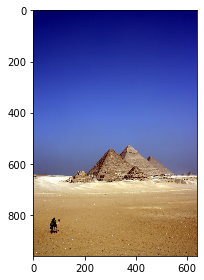

In [7]:
# Ex: imread and imshow 
pyramids = io.imread('pyramids.jpeg')
#queue image to be displayed
io.imshow(pyramids)
#display queued image
io.show()



In [8]:
# Use this function to show a histogram
# The image should be gray-scale and should range from 0 to 1
def showHist(img,histogramImg):
    plt.figure()
    bar(histogramImg[1]*255, histogramImg[0], width=0.8, align='center')

In [9]:
'''
@TODO:
Requirement #1 
-Read and print image 'coffee'  
-Show and print half of the  image
-----hint :use the attribute shape of numpy to get the image object dimentions
'''


"\n@TODO:\nRequirement #1 \n-Read and print image 'coffee'  \n-Show and print half of the  image\n-----hint :use the attribute shape of numpy to get the image object dimentions\n"

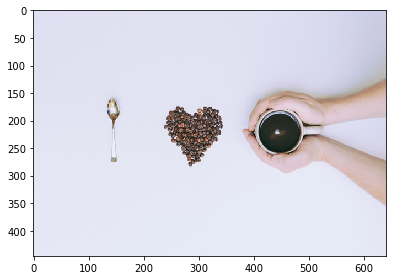

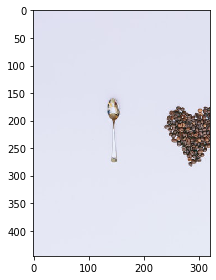

In [10]:
coffee = io.imread('coffee.jpeg')

io.imshow(coffee)
io.show()
io.imshow(coffee[:,0:np.array(coffee).shape[1]//2,:])
io.show()

In [11]:
'''
@TODO:
Requirement #2 
RGB to gray and HSV:
1- Write a function 'gray_image' that takes an image as input , then
    -get the gray scale of the image, then
    -display original image and the gray scale one side by side (subplot).
    -hint: use rgb2gray to get the graylevel of the image
- test your function with the image 'pyramids'
    
2- Write a function 'HSV_image' that takes an image as input , then
   -show the RGB image and the (3 channels of HSV image each channel in separated form ) one side by side (subplot).
   -hint: -use rgb2hsv (to get the hsv representation of the image).
          -To separately get the Hue, Saturation and Value channels, use hsvImg[:,:,X], 
           where hsvImg is the hsv representation of the image. 
           Hue is the first channel, Saturation is the second and value is the last channel.
- test your function for the images in HSV Folder. And comment on the results. 
'''

"\n@TODO:\nRequirement #2 \nRGB to gray and HSV:\n1- Write a function 'gray_image' that takes an image as input , then\n    -get the gray scale of the image, then\n    -display original image and the gray scale one side by side (subplot).\n    -hint: use rgb2gray to get the graylevel of the image\n- test your function with the image 'pyramids'\n    \n2- Write a function 'HSV_image' that takes an image as input , then\n   -show the RGB image and the (3 channels of HSV image each channel in separated form ) one side by side (subplot).\n   -hint: -use rgb2hsv (to get the hsv representation of the image).\n          -To separately get the Hue, Saturation and Value channels, use hsvImg[:,:,X], \n           where hsvImg is the hsv representation of the image. \n           Hue is the first channel, Saturation is the second and value is the last channel.\n- test your function for the images in HSV Folder. And comment on the results. \n"

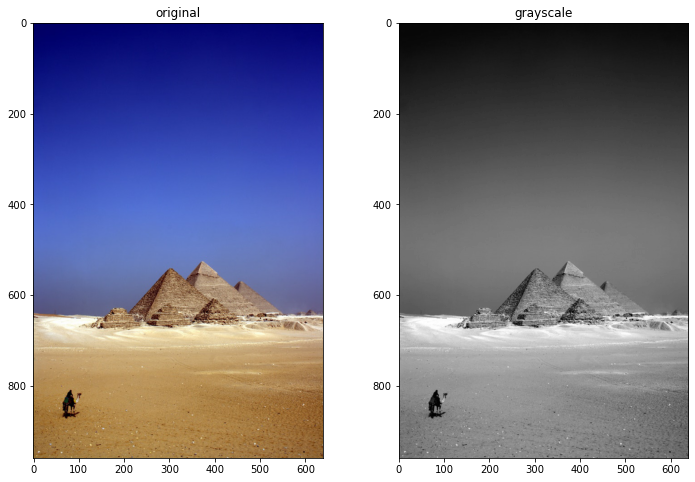

In [12]:
def gray_image(image):
    gray_img = rgb2gray(image)
    show_images([image, gray_img], ["original", "grayscale"])

pyramids = io.imread('pyramids.jpeg')
gray_image(pyramids)


Hue colors (red -> yello -> green -> cyan -> blue -> magneta)

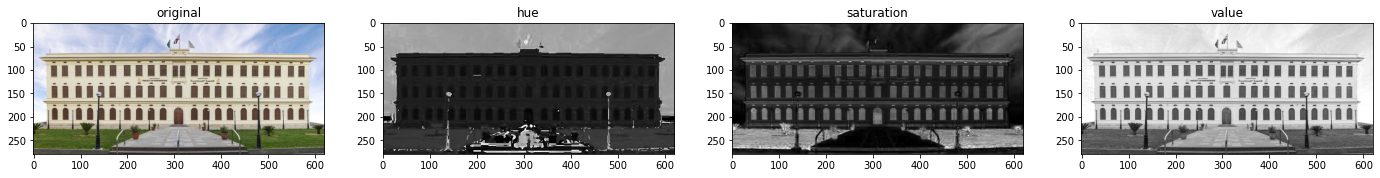

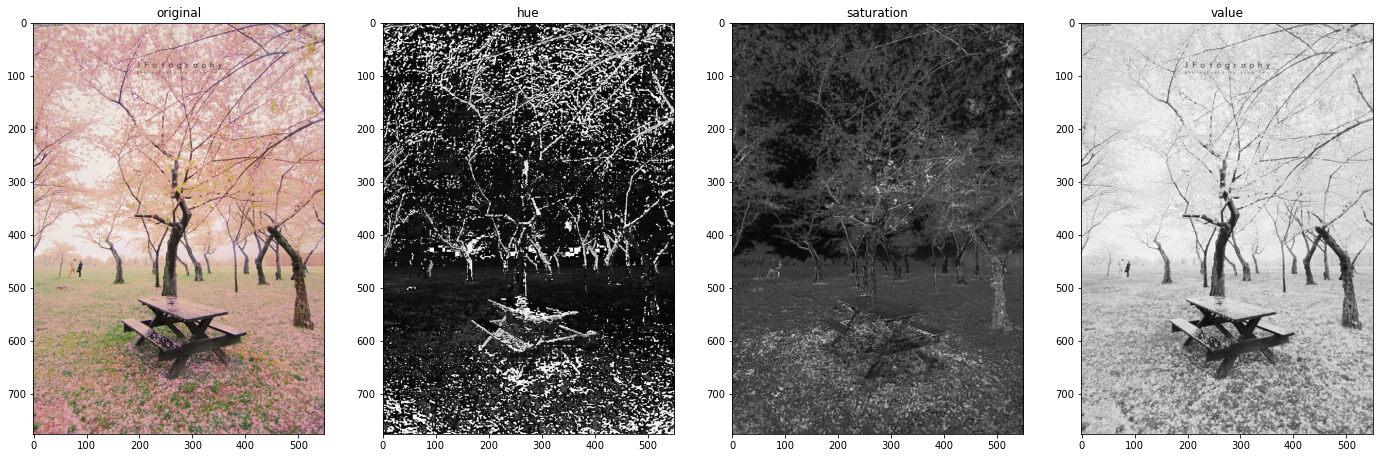

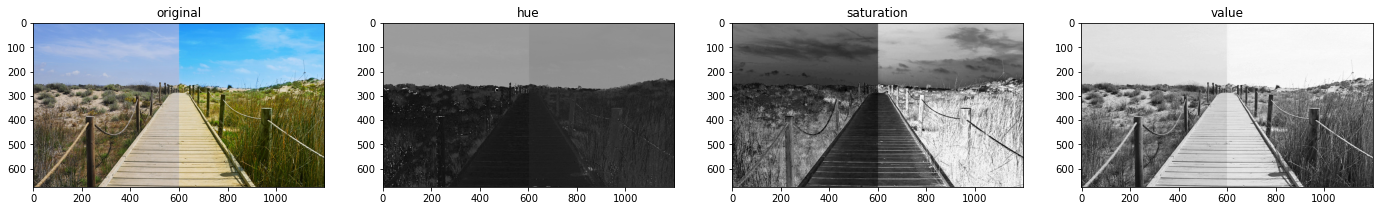

In [13]:

def HSV_image(image):
    HSV_img = rgb2hsv(image)
    show_images(
        [image, HSV_img[:,:,0], HSV_img[:,:,1], HSV_img[:,:,2]],
        ["original", "hue", "saturation", "value"]
    )
ex1 = io.imread('hsv/ex1.png')
HSV_image(ex1)
print()
# low saturation
## high value


ex2 = io.imread('hsv/ex2.jpg')
HSV_image(ex2)
print()
#low hue (pink)
## low saturation
## high value


ex3 = io.imread('hsv/ex3.jpg')
HSV_image(ex3)
print()
#relatively similar hue (darker in the right half)
## high value and higher saturation in the right half


In [14]:
'''
Requirement 2 (Noise):
http://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise

1.For an image of your choice (the effect of noise must be obvious): 
    Read the image.
    Convert it to greyscale.
    Apply salt & pepper noise with 
    amount=0.05, 0.5 and 0.9
   
2. From the other images. Recommend one image that won’t be greatly affected by the noise and state why.    
    '''


'\nRequirement 2 (Noise):\nhttp://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise\n\n1.For an image of your choice (the effect of noise must be obvious): \n    Read the image.\n    Convert it to greyscale.\n    Apply salt & pepper noise with \n    amount=0.05, 0.5 and 0.9\n   \n2. From the other images. Recommend one image that won’t be greatly affected by the noise and state why.    \n    '

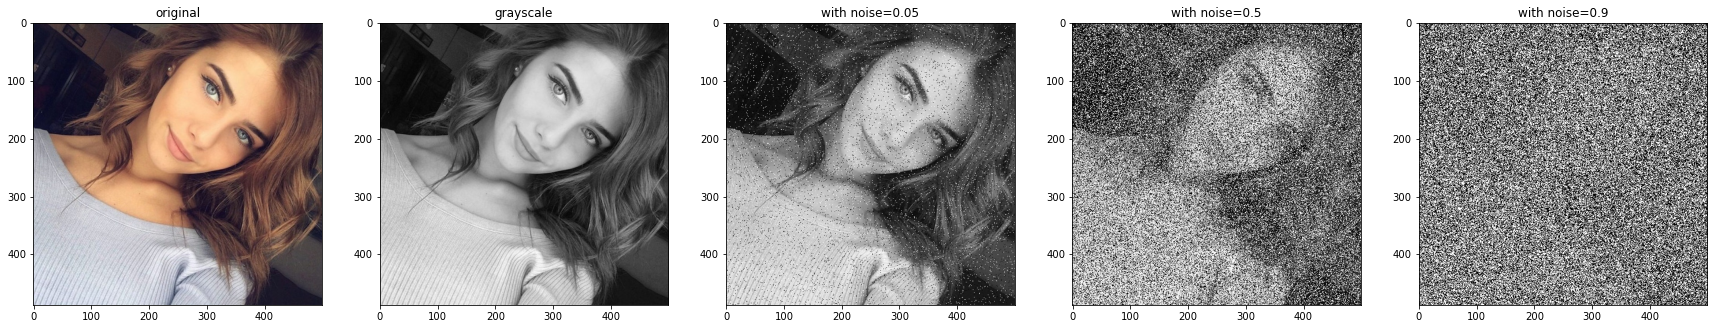

In [15]:
from skimage.util import random_noise

def compare_noise(image):
    gray_image = rgb2gray(image)
    noisy1 = random_noise(image=gray_image, mode='s&p',amount=0.05)
    noisy2 = random_noise(image=gray_image, mode='s&p',amount=0.5)
    noisy3 = random_noise(image=gray_image, mode='s&p',amount=0.9)
    show_images(
        [image, gray_image, noisy1, noisy2, noisy3],
        ['original', 'grayscale', 'with noise=0.05','with noise=0.5', 'with noise=0.9']
    )

selfie = io.imread('selfie.jpg')
compare_noise(selfie)

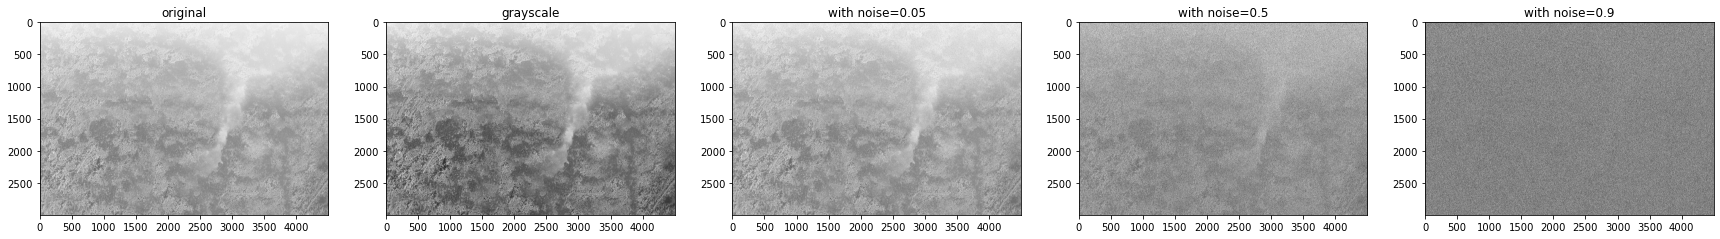

In [16]:
# histogram/ex1.jpg because it has rough texture
## and very low smoothness
image = io.imread('histogram/ex1.jpg')
compare_noise(image)


In [17]:
'''
Requirement 3 (Histogram):

1- For the given images ( in histogram folder): 
    Read the image.
    Apply histogram and show it.
Hint
    A) Use histogram (image) to get histogram. Try different values for nbins (256,64,8), What does it mean?
    B) and function(showHist) to draw it.
** 2- Draw a grey-scale image that has uniform histogram 
same number of pixels for all intensity levels) using code only. Let the size of the image be 256x256.
use np.ones to draw image with ones.
'''

'\nRequirement 3 (Histogram):\n\n1- For the given images ( in histogram folder): \n    Read the image.\n    Apply histogram and show it.\nHint\n    A) Use histogram (image) to get histogram. Try different values for nbins (256,64,8), What does it mean?\n    B) and function(showHist) to draw it.\n** 2- Draw a grey-scale image that has uniform histogram \nsame number of pixels for all intensity levels) using code only. Let the size of the image be 256x256.\nuse np.ones to draw image with ones.\n'

255
255.63725490196077


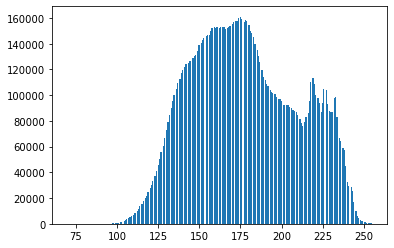

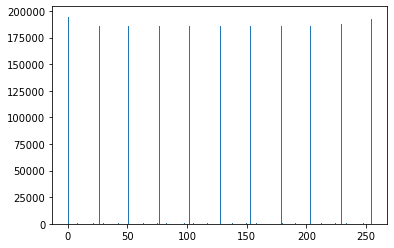

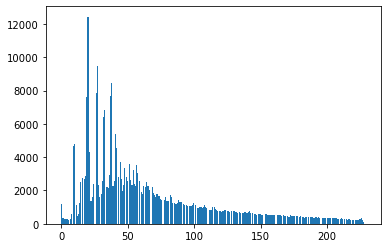

In [18]:
# checking if the R, G and B matrices for the 3 images 
## are equal using ((np.array == np.array).all()) shows that
## the 3 color matrices are equal across all the images

# ex2 has an additional matrix dimension whose pixels are all black
## checked using np.all(numpyarr == numpyarr[0])

ex1 = rgb2gray(io.imread('histogram/ex1.jpg'))

ex2 = rgb2gray(rgba2rgb(io.imread('histogram/ex2.png')))
ex3 = rgb2gray(io.imread('histogram/ex3.png'))

# changing nbins change the number of bars generated and plotted in the plot
## with the number of nbins is the same as the number of bars
ex1_hist = histogram(ex1, 256);
showHist(ex1,ex1_hist)
print(len(ex1_hist[0])-1)
print(ex1_hist[1][len(ex1_hist[0])-1]*256)

ex2_hist = histogram(ex2, 256);
showHist(ex2,ex2_hist)

ex3_hist = histogram(ex3, 256);
showHist(ex3,ex3_hist)


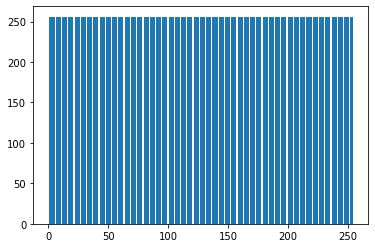

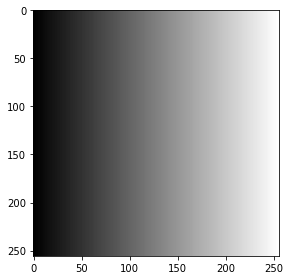

In [19]:
from time import sleep


row_mat = np.arange(256)/256.0
mat = np.tile(row_mat, (256,1))

mat_hist = histogram(mat,256)
showHist(mat,mat_hist)
io.show()

io.imshow(mat)
io.show()